# Austin Sievert

## Overview

### Data Cleaning:
    • Dropped rows with missing values using the dropna() function.
    • Renamed variables with multiple spellings/variations using str.replace() function.
    • Reformatted the column names for ease of use using replace() function.

### Average Salary by Education Level:
    • Grouped the data by education level and calculated the average salary for each level using groupby() and mean().
    • Plotted a bar chart to visualize the average salary by education level, showing that higher education levels tend to have higher salaries.

### Age vs. Education:
    • Created a boxplot to compare the age distribution for different education levels, demonstrating that average age increases with higher education levels.

### Average Salary by Gender:
    • Calculated the mean salary and count for each gender using groupby() and agg().
    • Plotted a bar chart to show the average salary by gender, indicating any gender-based salary differences.

### Average Salary for Data Analysts by Education Level:
    • Filtered the dataset for data analyst job titles.
    • Grouped the data by education level and calculated the average salary for data analysts with each level of education.
    • Plotted a bar chart to visualize the average salary for data analysts by education level, revealing a higher average salary for those with a bachelor's degree compared to a master's degree.

### Years of Experience Analysis:
    • Calculated the average years of experience for data analysts by education level.
    • Examined the count of data points for each education level to understand the distribution of data.
    • These analyses provided some insights into the relationship between years of experience, education level, and salary for data analysts.

### Linear Regression Prediction:
    • Used linear regression to predict salaries for data analysts based on years of experience.
    • Trained a linear regression model using the LinearRegression() function from scikit-learn.
    • Predicted salaries for entry-level (1 year of experience) and after 6 years of experience.

### Salary Data Analysis

#### Import Python Packages

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

#### Read dataset from csv and store as a dataframe. Explore the dataframe

In [155]:
df = pd.read_csv('Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [156]:
df.shape

(6704, 6)

In [157]:
column_headers = list(df.columns.values)
print("Column Names :", column_headers)

Column Names : ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [158]:
df.columns = df.columns.str.replace(' ', '_')
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [159]:
df.isnull().sum()

Age                    2
Gender                 2
Education_Level        3
Job_Title              2
Years_of_Experience    3
Salary                 5
dtype: int64

#### Handling the problems

In [160]:
df = df.dropna()

In [161]:
df.isnull().sum()

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    0
Salary                 0
dtype: int64

In [163]:
unique_education_levels = df['Education_Level'].unique()
# Print the unique education levels
print(unique_education_levels)

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [168]:
df.loc[:, 'Education_Level'] = df['Education_Level'].replace({"Bachelor's Degree": "Bachelor's"})
df.loc[:, 'Education_Level'] = df['Education_Level'].replace({"Master's Degree": "Master's"})
df.loc[:, 'Education_Level'] = df['Education_Level'].replace({"phD":"PhD"})

In [169]:
unique_education_levels = df['Education_Level'].unique()
# Print the unique education levels
print(unique_education_levels)

["Bachelor's" "Master's" 'PhD' 'High School']


In [170]:
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0


## Average Salary by Education Level

In [178]:
salary_mean = df.groupby('Education_Level')['Salary'].mean()
salary_mean = salary_mean.sort_values(ascending=False)
print(salary_mean)

Education_Level
PhD            165651.457999
Master's       130112.056452
Bachelor's      95082.908640
High School     36706.694196
Name: Salary, dtype: float64


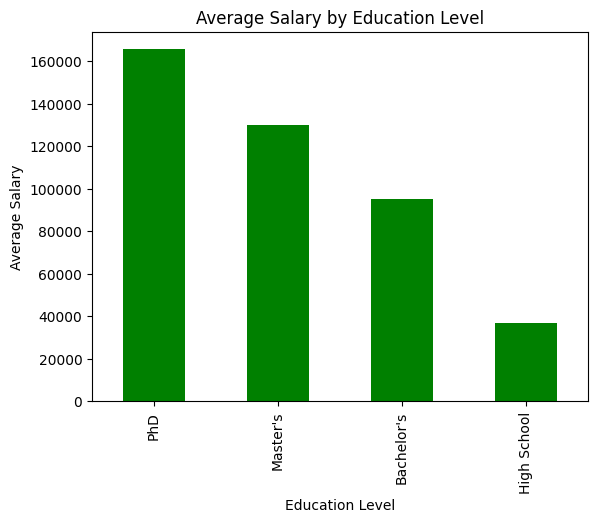

In [195]:
salary_mean.plot(kind='bar', color = 'green')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title("Average Salary by Education Level")
plt.show()

#### No surprise here, as education level increases, average salary increases.

## Age vs Education

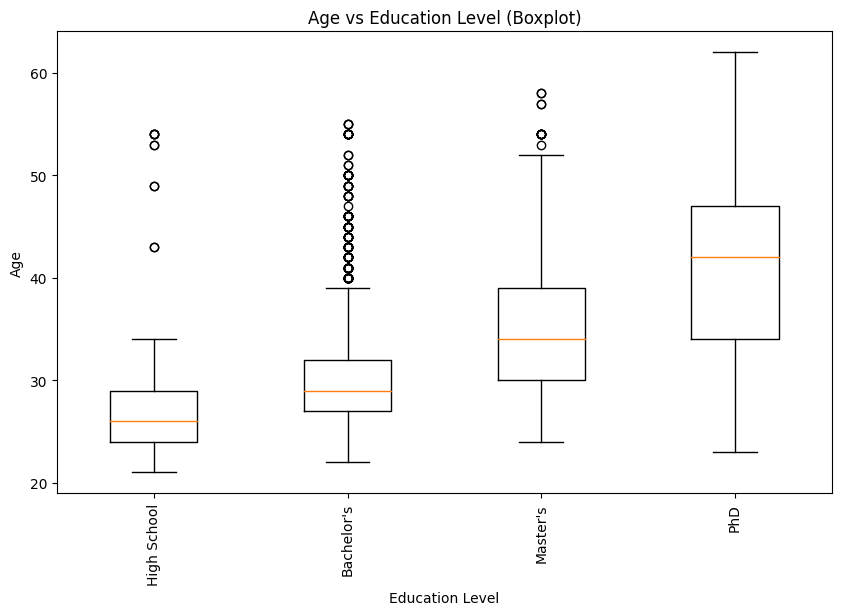

In [175]:
education_order = ["High School", "Bachelor's", "Master's", "PhD"]
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Education_Level'] == level]['Age'] for level in education_order],
            labels=education_order)
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('Age vs Education Level (Boxplot)')
plt.xticks(rotation=90)
plt.show()

#### Again no surprises, the average age for each education level increases as more time is required to complete each subsequent degree

## Male vs Female Average Salary

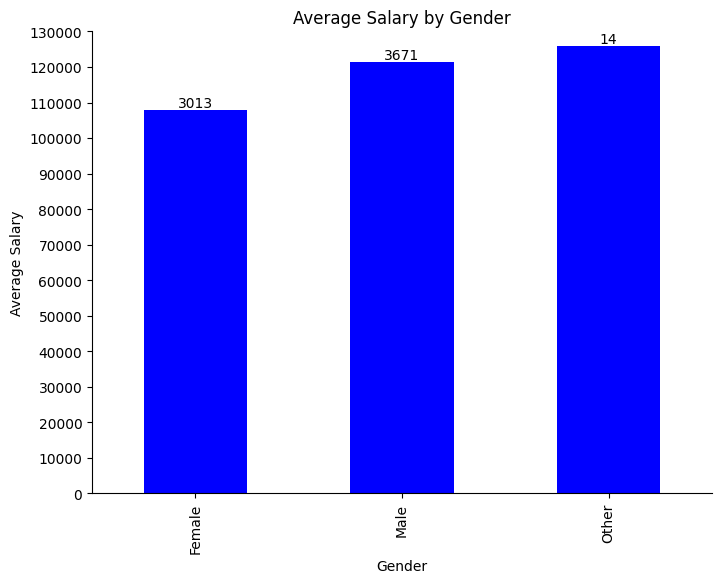

In [188]:
# Calculate the mean salary and count for each gender
gender_stats = df.groupby('Gender')['Salary'].agg(['mean', 'count'])

# Plot the average salary
plt.figure(figsize=(8, 6))
gender_salary_mean = gender_stats['mean']
gender_salary_mean.plot(kind='bar', color='blue')


gender_count = gender_stats['count']
x_offset = -0.15
y_offset = 500
for i, count in enumerate(gender_count):
    plt.text(i, gender_salary_mean[i], f'{count}', ha='center', va='bottom')
    y_offset = max(y_offset, count + 200)

plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender')


plt.ylim(top=y_offset)
plt.yticks(range(0, int(max(gender_salary_mean)) + 10000, 10000))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### We want to know the how much a Data Analyst get paid based on their education level

In [212]:
data_analyst = df[df.Job_Title == 'Data Analyst']
analyst_salary_education = data_analyst.groupby('Education_Level')['Salary'].mean()
print(analyst_salary_education)

Education_Level
Bachelor's    129783.972125
Master's      107368.421053
Name: Salary, dtype: float64


Text(0, 0.5, 'Average Salary')

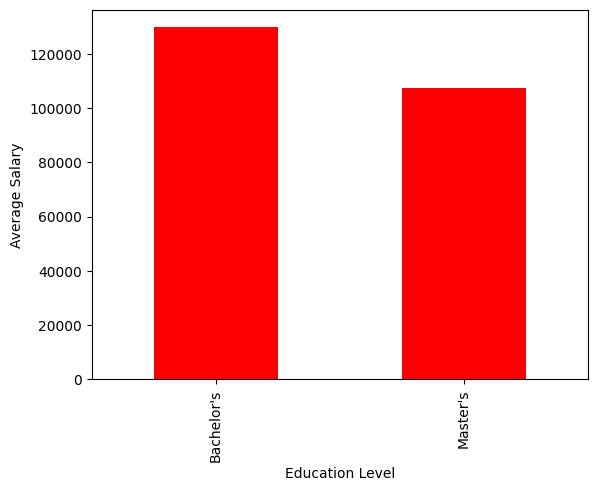

In [213]:
analyst_salary_education.plot(kind = 'bar', color = 'red')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')

#### Interesting findings here, data suggests a bachelor's degree is pulling a higher salary than a masters. Let's investigate.

##### Data points that I would be interested in are geographic location, scope of work (government contracting, security clearance requirements, etc.) and years of experience in the field. Also how many datapoints do we have for each degree type? Is the data skewed in some way?

In [214]:
years_experience_stats = data_analyst.groupby('Education_Level')['Years_of_Experience'].mean()
print(years_experience_stats)

Education_Level
Bachelor's    4.428571
Master's      7.013158
Name: Years_of_Experience, dtype: float64


In [216]:
education_counts = data_analyst['Education_Level'].value_counts()
print(education_counts)

Education_Level
Bachelor's    287
Master's       76
Name: count, dtype: int64


#### We would need more data to confirm our findings. However, it seems to show employers prefer a data analyst with a Bachelor's degree. It is possible those with a Master's degree are moving into management level positions such as Project Management or executive level roles.

#### We also see that we have almost 4x the amount of datapoints for data analysts with a Bachelor's degree than a Master's degree

# Let's use linear regression to predict how much a data analyst will make entry level (0-1 years experience)

In [244]:
# Prepare the variables
X = data_analyst['Years_of_Experience'].values.reshape(-1,1)
y = data_analyst['Salary'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X,y)

# Predict for 1 year experience
entry_experience = 1
entry_predicted_salary = model.predict([[entry_experience]])

In [245]:
print(f"Predicted Salary after {entry_experience} years of experience: {entry_predicted_salary[0]}")

Predicted Salary after 1 years of experience: 101244.22753379359


## What if they stay in their position for 6 years?

In [246]:
# Predict for 6 years experience
experience = 6
predicted_salary = model.predict([[experience]])

In [247]:
print(f"Predicted Salary after {experience} years of experience: {predicted_salary[0]}")

Predicted Salary after 6 years of experience: 131280.1241515345
